In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

/home/sergio/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('../results.csv')
df.shape

(45773, 19)

In [6]:
#features and target selection
features = ['_map', 'date','starting_ct', 'rank_1', 'rank_2']
target = ['map_winner']
X = df[features]
y = df[target]

In [7]:
#label encoder
#to go back: le.insverse_transform()
le = preprocessing.LabelEncoder()

X.loc[:, 'date'] = le.fit_transform(X['date'])
X.loc[:, '_map'] = le.fit_transform(X['_map'])
X.head()

/home/sergio/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,_map,date,starting_ct,rank_1,rank_2
0,3,1541,2,62,63
1,4,1541,2,62,63
2,4,1541,1,140,118
3,4,1541,2,61,38
4,9,1541,2,61,38


In [8]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC()

In [9]:
svc.fit(X_train, y_train)

/home/sergio/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
print('Train score: {:.3f}'.format(svc.score(X_train, y_train)))
print('Test score: {:.3f}'.format(svc.score(X_test, y_test)))

Train score: 0.606
Test score: 0.608


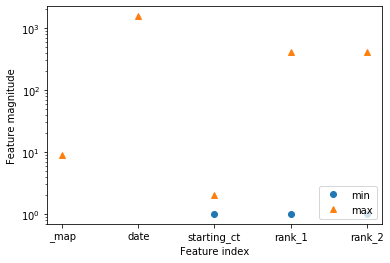

In [11]:
#feature importance in log scale
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [12]:
#preprocessing (rescales...)

min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
_map           0.0
date           0.0
starting_ct    0.0
rank_1         0.0
rank_2         0.0
dtype: float64
Maximum for each feature
 _map           1.0
date           1.0
starting_ct    1.0
rank_1         1.0
rank_2         1.0
dtype: float64


In [13]:
X_test_scaled = (X_test - min_train) / range_train

In [16]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

/home/sergio/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
print('Train score: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Train score: 0.621
Test score: 0.618
